In [1]:
#Packages for data analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [2]:
recipes = pd.read_csv('Waffles vs Pancakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Waffle,55,28,43,7,5,2,0,0
1,Waffle,57,26,22,6,9,1,0,0
2,Waffle,47,23,38,10,4,1,0,0
3,Waffle,45,11,37,17,8,1,0,0
4,Waffle,50,25,22,6,5,2,1,0


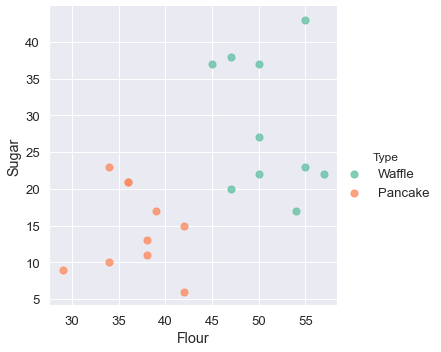

In [3]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set2', fit_reg=False, scatter_kws={"s": 50});

In [4]:
# format or pre-process our data
ingredients = recipes [['Flour', 'Sugar']].values
type_label = np.where(recipes['Type']=='Waffle', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
print(recipe_features)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


In [5]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
#print(type_label)

SVC(kernel='linear')

In [6]:
# Create the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

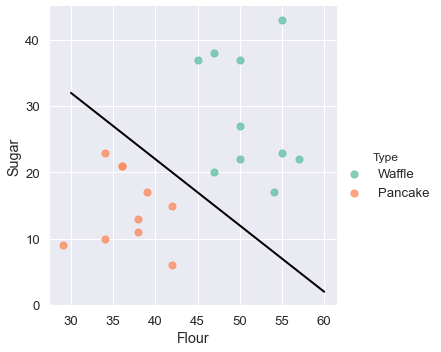

In [7]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 50})
plt.plot(xx, yy, linewidth=2, color='black');

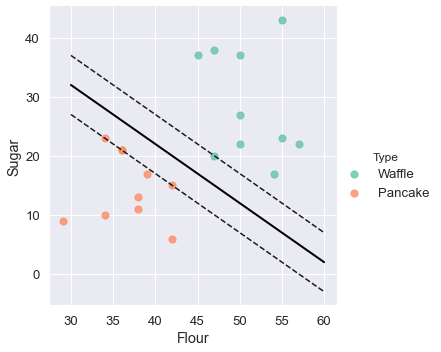

In [8]:

# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 50})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [9]:
# Create a function to guess when a recipe is a waffle or a pancake
def waffle_or_pancake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a waffle recipe!')
    else:
        print('You\'re looking at a pancake recipe!')

In [10]:
# Predict if 50 parts flour and 20 parts sugar
waffle_or_pancake(50, 20)

You're looking at a waffle recipe!


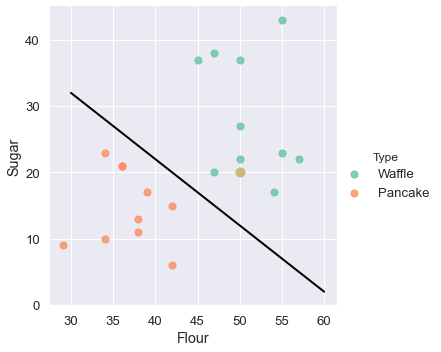

In [11]:

# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 50})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [12]:
# Predict if 40 parts flour and 20 parts sugar
waffle_or_pancake(40,20)

You're looking at a pancake recipe!


In [13]:
waffle_cupcake_dict = {'waffle_pancake_model': model, 'waffle_pancake_features': ['Flour','Sugar'], 'all_features': recipe_features}
waffle_cupcake_dict 

{'waffle_pancake_model': SVC(kernel='linear'),
 'waffle_pancake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}